<a href="https://www.kaggle.com/code/amirmotefaker/superstore-sales-analysis?scriptVersionId=124155872" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Data Exploration

In [2]:
df = pd.read_excel('/kaggle/input/superstore-sales-dataset/superstore_sales.xlsx')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Get the number of rows and columns
df.shape

(51290, 21)

In [5]:
# Count the number of missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Data Visualization

In [6]:
# Which are the most selling products?
buy = df.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:10]
buy

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

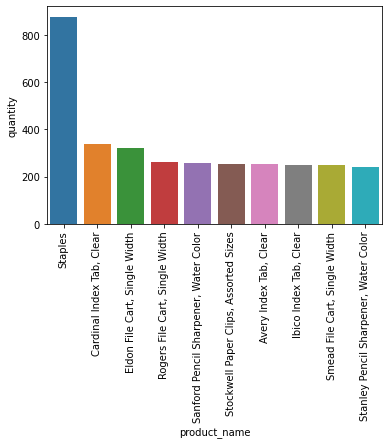

In [7]:
sns.barplot(x='product_name',y='quantity',data=buy.reset_index())
plt.xticks(rotation = 'vertical')

In [8]:
# Which are the Top 10 products by sales?
productSales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
productSales.sort_values(by=['sales'], inplace=True, ascending=False)
productSales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [9]:
# Which are the most profitable products?
profitable_products = pd.DataFrame(df.groupby(['product_name']).sum()['profit'])
profitable_products.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_products.head(10)

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

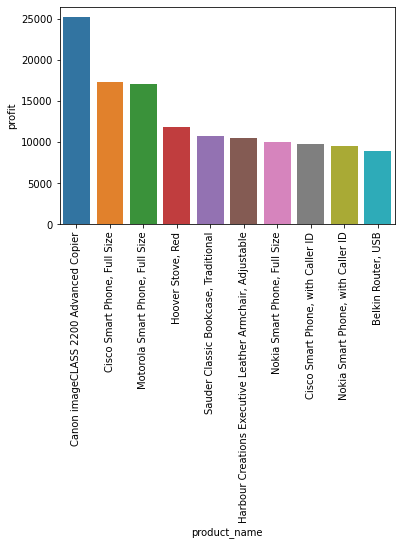

In [10]:
sns.barplot(x='product_name',y='profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

In [11]:
# What category sold the most?
df.groupby(['category','sales']).sum()

quantity  discount     profit  shipping_cost  year
category   sales                                                        
Furniture  1.892             1       0.6    -0.9933        0.18000  2014
           1.988             1       0.6    -1.4413        0.17000  2014
           2.032             1       0.6    -1.3208        0.10000  2014
           2.328             4       1.2    -1.5132        0.38000  4026
           2.784             2       0.2     0.4176        0.14000  2014
...                        ...       ...        ...            ...   ...
Technology 10499.970         3       0.0  5039.9856      363.19000  2014
           11199.968         4       0.2  3919.9888       45.98000  2014
           13999.960         4       0.0  6719.9808       20.00054  2014
           17499.950         5       0.0  8399.9760      349.07000  2013
           22638.480         6       0.5 -1811.0784       24.28650  2011

[29131 rows x 5 columns]

In [12]:
# Which are the most profitable category?
profitable_category = pd.DataFrame(df.groupby(['category']).sum()['profit'])
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


In [ ]:
# Plot the most profitable category
plt.figure(figsize=(17, 5))
plt.bar(df['category'],df['sales'],color = 'b')
plt.xticks(size=8)
plt.show()

In [ ]:
# Total sales values by category and subcategory
df.groupby(['category','sub_category']).sum()

In [ ]:
# Which are the most selling products in subcategory?
df.groupby(["category", "sub_category"], as_index=False)["quantity"].count()

In [ ]:
# Which customer segments are the most profitable?
profitable_segment = pd.DataFrame(df.groupby(['segment']).sum()['profit'])
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

In [ ]:
# Plot which customer segments are the most profitable
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

In [ ]:
# What shipping modes sold the most products?
plt.figure(figsize=(14, 6))
plt.bar(df['ship_mode'],df['sales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
# Visualize the 'Category' column from the 'Ship Mode' column dataset standpoints.
category_hist = sns.FacetGrid(df, col='ship_mode', palette='rainbow')
category_hist.map(plt.hist, 'category')

In [ ]:
# What market sold the most products?
sns.set_style('whitegrid')
sns.countplot(x='market',data=df, palette='rainbow')

In [ ]:
# Which are the Top 10 country by sales?
countries = pd.DataFrame(df.groupby('country').sum()['sales'])
countries.sort_values('sales',inplace=True, ascending=False)
countries.head(10)

In [ ]:
# Create a pie chart with the 10 countries that have the most sales
countries = countries.sort_values(by = 'sales',ascending = False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()

In [ ]:
# Which are the average shipping cost for top 10 different countries?
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

In [ ]:
# Who are the top-10 most profitable customers?
data10 = df.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]
data10

In [ ]:
# Create month column from order date - Add a new column (month)
month = df['order_date'].astype(str) 
month = month.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
df['month'] = month.map(lambda x: x.month) 
df

In [ ]:
# Total sales values by year and month
date = df.groupby(['year','month']).sum()
date

In [ ]:
# Total sales chart by the year
sns.barplot(x='year',y='sales',data=date.reset_index())
plt.xticks(rotation = 'vertical')